# LDA
_Latent Dirichlet Allocation_

## Sumber
Farras baca lebih lanjut disini untuk lebih mengerti [Sumbernya Gaaaaan!](https://www.kaggle.com/code/rowhitswami/keywords-extraction-using-tf-idf-method)

### Lets write something that my wife couldn't understand

In [85]:
# Import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Load the data
Saya menggunakan data dari google API, udah di download, tinggal panggil datanya

In [91]:
# df = pd.DataFrame.from_dict(comments)

df = pd.read_csv('Data/dummy_email_data.csv')
# df['real_index'] = df.index
# df = df.drop(columns=['Unnamed: 0'])
df.head()

,nomor urut,deskripsi email,pengirim
0,1,Saya sangat puas dengan fitur ini karena memba...,feedback@company.com
1,2,Saya sangat kecewa dengan fitur ini karena ser...,disappointed@domain.com
2,3,Selamat! klik di sini untuk memenangkan hadiah...,offer@cheapproducts.com
3,4,Saya sangat puas dengan fitur ini karena membe...,supporter@client.org
4,5,Saya sangat kecewa dengan fitur ini karena mem...,complaint@client.org


### Fungsi pembantu

In [47]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\\s+',' ',text)
    
    return text

def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    #generate tf-idf
    tf_idf_vector = vectorizer.transform([doc])
    
    #mengurutkan tf-idf vectors dengan descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #Hanya mengambil 10 kalimat paling sering muncul
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return list(keywords.keys())

In [21]:
# Static variable
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""

In [89]:
stopwords_list = stopwords.words('indonesian')

In [27]:
### Calculate

In [92]:
deskripsi = df['deskripsi email'].to_list()

vectorizer = TfidfVectorizer(stop_words=stopwords_list, smooth_idf=True, use_idf=True)# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(deskripsi)

# Storing vocab
feature_names = vectorizer.get_feature_names_out()

D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [93]:
result = []
for doc in deskripsi:
    df = {}
    df['full_text'] = doc
    df['top_keywords'] = get_keywords(vectorizer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final.index +=1
final

,full_text,top_keywords
1,Saya sangat puas dengan fitur ini karena memba...,"[tugas, pengelolaan, harian, membantu, solusi,..."
2,Saya sangat kecewa dengan fitur ini karena ser...,"[menyebabkan, crash, solusi, pengguna, aplikas..."
3,Selamat! klik di sini untuk memenangkan hadiah...,"[klik, memenangkan, iphone, hadiah, terbaru, t..."
4,Saya sangat puas dengan fitur ini karena membe...,"[proyek, pelacakan, kemudahan, solusi, penggun..."
5,Saya sangat kecewa dengan fitur ini karena mem...,"[pekerjaan, efisien, solusi, pengguna, lambat,..."
6,Selamat! dapatkan jutaan rupiah hanya dari rum...,"[rumah, modal, jutaan, rupiah, dapatkan, terba..."
7,Saya sangat puas dengan fitur ini karena membu...,"[kolaborasi, efisien, tim, solusi, pengguna, m..."
8,Saya sangat kecewa dengan fitur ini karena tid...,"[pengguna, kebutuhan, solusi, profesional, ses..."
9,Selamat! program ini telah membuat ribuan oran...,"[ribuan, orang, miliarder, program, terbatas, ..."
10,Saya sangat puas dengan fitur ini karena menye...,"[mudah, menyediakan, laporan, komprehensif, di..."


In [53]:
## Bags of words kalimat spam

In [94]:
topKeywordsSpam = final[final.index % 3 == 0].top_keywords
# Append datra
list_spam_top_list_words = [' '.join(a) for a in topKeywordsSpam]
string_spam_topList_words =' '.join(list_spam_top_list_words)
string_spam_topList_words

'klik memenangkan iphone hadiah terbaru terbatas sukses selamat rumah ribuan rumah modal jutaan rupiah dapatkan terbatas sukses selamat ribuan penawaran ribuan orang miliarder program terbatas sukses selamat rumah penawaran lewatkan lewatkan kesempatan langka kaya terbatas sukses selamat rumah ribuan penawaran jamin uang terbatas sukses selamat rumah ribuan penawaran orang lewatkan penawaran eksklusif terbatas sukses selamat rumah ribuan orang lewatkan klik juta bonus bergabung rupiah dapatkan terbatas sukses selamat rumah ribuan santai penghasilan bos kerja dapatkan terbatas sukses selamat rumah ribuan otomatis ikuti hasilkan afiliasi uang program terbatas sukses selamat rumah orang berhasil terbatas sukses selamat rumah ribuan penawaran lewatkan klik'

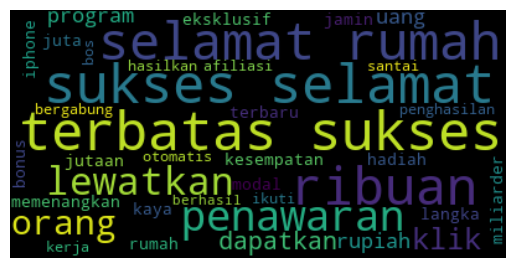

In [95]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(string_spam_topList_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()